In [16]:
from geopy.geocoders import Nominatim
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import urllib.request
inpp=pd.read_csv(r"./input.csv",header=None)

In [35]:
start_date=inpp.iloc[0,0]
end_date=inpp.iloc[0,1]
address=inpp.iloc[0,2]
nom=Nominatim(user_agent="manuheralagi4@gmail.com")
loc=nom.geocode(address)
if(loc==None):
    print("Invalid address")
    
print(loc.address)
print(loc.latitude)
print(loc.longitude)



Dharwad, Dharawada taluku, Dharwad District, Karnataka, 580001, India
15.4540505
75.0066516


In [4]:

link="https://power.larc.nasa.gov/api/temporal/daily/point?start="+str(start_date)+"&end="+str(end_date)+"&latitude="+str(loc.latitude)+"&longitude="+str(loc.longitude)+"&community=ag&parameters=T2M_MAX%2CT2M_MIN%2CRH2M%2CPRECTOTCORR%2CPS%2CWS10M_RANGE&format=csv&header=true&time-standard=lst"

In [5]:
urllib.request.urlretrieve(link,'w.csv')

('w.csv', <http.client.HTTPMessage at 0x7f8a7af00950>)

In [4]:
x=pd.read_csv(r"./w.csv",skiprows=14)

In [5]:
x

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
0,2020,1,28.73,16.15,80.12,0.00,94.27,3.10
1,2020,2,28.82,17.11,78.25,0.00,94.40,1.74
2,2020,3,28.77,15.40,75.69,0.00,94.34,2.53
3,2020,4,27.45,13.87,73.88,0.00,94.20,2.57
4,2020,5,28.55,12.13,67.94,0.00,94.15,2.69
...,...,...,...,...,...,...,...,...
1092,2022,362,28.52,18.61,84.00,0.20,94.44,2.09
1093,2022,363,27.87,17.00,79.94,0.07,94.55,1.43
1094,2022,364,27.94,16.21,79.56,0.07,94.61,0.96
1095,2022,365,27.94,15.29,73.56,0.00,94.53,1.46


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1097 non-null   int64  
 1   DOY          1097 non-null   int64  
 2   T2M_MAX      1097 non-null   float64
 3   T2M_MIN      1097 non-null   float64
 4   RH2M         1097 non-null   float64
 5   PRECTOTCORR  1097 non-null   float64
 6   PS           1097 non-null   float64
 7   WS10M_RANGE  1097 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 68.7 KB


In [7]:
x.describe()

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,2021.000912,183.000912,30.394676,19.734075,72.930693,3.929608,93.903737,3.379954
std,0.818914,105.606102,4.293146,2.994989,17.865081,7.356419,0.261910,1.121722
min,2020.000000,1.000000,21.330000,10.950000,22.880000,0.000000,93.030000,0.870000
25%,2020.000000,92.000000,27.190000,17.680000,59.310000,0.000000,93.720000,2.530000
50%,2021.000000,183.000000,28.580000,20.730000,80.560000,0.600000,93.890000,3.320000
75%,2022.000000,274.000000,33.730000,21.790000,87.310000,4.640000,94.110000,4.140000
max,2023.000000,366.000000,40.430000,26.100000,96.120000,61.370000,94.610000,7.610000


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x.loc[:, ~x.columns.isin(['YEAR',"DOY",])])
print('Scaled df:\n', scaled, '\n', scaled.shape)

Scaled df:
 [[0.38743455 0.34323432 0.78154014 0.         0.78481013 0.33086053]
 [0.3921466  0.40660066 0.75600765 0.         0.86708861 0.12908012]
 [0.3895288  0.29372937 0.72105407 0.         0.82911392 0.2462908 ]
 ...
 [0.3460733  0.34719472 0.77389405 0.00114062 1.         0.01335312]
 [0.3460733  0.28646865 0.6919716  0.         0.94936709 0.08753709]
 [0.32513089 0.35115512 0.67749863 0.         0.91139241 0.1231454 ]] 
 (1097, 6)


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled, test_size = 0.1425, shuffle = False)
x_train, y_train, x_test, y_test = [], [], [], []
for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [10]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.387435,0.343234,0.781540,0.000000,0.784810,0.330861
1,0.392147,0.406601,0.756008,0.000000,0.867089,0.129080
2,0.389529,0.293729,0.721054,0.000000,0.829114,0.246291
3,0.320419,0.192739,0.696341,0.000000,0.740506,0.252226
4,0.378010,0.077888,0.615238,0.000000,0.708861,0.270030
...,...,...,...,...,...,...
934,0.234031,0.667327,0.907018,0.018087,0.417722,0.353116
935,0.283246,0.671947,0.878072,0.013036,0.405063,0.535608
936,0.324607,0.654785,0.863463,0.038292,0.481013,0.278932
937,0.369634,0.655446,0.847351,0.022975,0.525316,0.302671


In [11]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.392147,0.406601,0.756008,0.000000,0.867089,0.129080
1,0.389529,0.293729,0.721054,0.000000,0.829114,0.246291
2,0.320419,0.192739,0.696341,0.000000,0.740506,0.252226
3,0.378010,0.077888,0.615238,0.000000,0.708861,0.270030
4,0.382723,0.403300,0.738121,0.000000,0.810127,0.654303
...,...,...,...,...,...,...
934,0.283246,0.671947,0.878072,0.013036,0.405063,0.535608
935,0.324607,0.654785,0.863463,0.038292,0.481013,0.278932
936,0.369634,0.655446,0.847351,0.022975,0.525316,0.302671
937,0.300000,0.673267,0.889132,0.647222,0.481013,0.014837


In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((939, 6), (939, 6), (156, 6), (156, 6))

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

2023-08-18 17:47:29.934635: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 17:47:30.038793: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 17:47:30.041269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 17:47:33.366274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
model = Sequential()
model.add(Dense(8, input_dim = 6, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6))

model.summary()
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 15, shuffle = False)

Epoch 1/100
63/63 [==============================] - 4s 8ms/step - loss: 0.2298 - accuracy: 0.1022 - val_loss: 0.1261 - val_accuracy: 0.0128
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 0.0749 - accuracy: 0.0895 - val_loss: 0.0511 - val_accuracy: 0.1218
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.2918 - val_loss: 0.0306 - val_accuracy: 0.6987
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.4356 - val_loss: 0.0250 - val_accuracy: 0.8526
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.4963 - val_loss: 0.0222 - val_accuracy: 0.8782
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.5761 - val_loss: 0.0203 - val_accuracy: 0.8846
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.6518 - val_loss: 0.0189 - val_accuracy: 0.8846
Epoch 8/100
6

In [19]:
model.save("model.h5")
print("Model Saved to disk")
model = load_model("model.h5")
model.summary()

/home/manhera/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved to disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

5/5 [==============================] - 0s 4ms/step


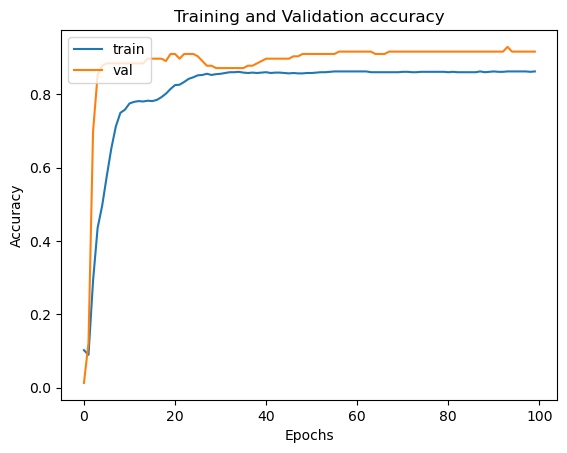

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

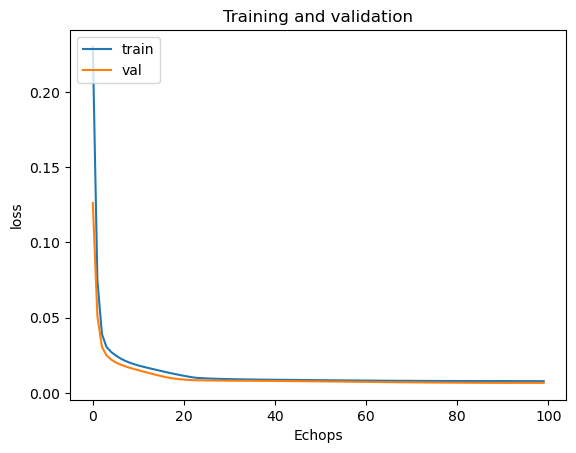

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and validation")
plt.xlabel('Echops')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')

In [23]:
print('Actual values:')
print(' RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE')
print(pd.DataFrame(actual_y_pred))

print('Predicted values:')
print(' PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE')
print(pd.DataFrame(y_pred))

Actual values:
 RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE
         0      1      2      3      4     5
0    29.17  22.86  84.56   2.90  93.69  2.34
1    27.14  22.27  88.62  18.60  93.57  2.09
2    27.44  21.83  88.94  11.04  93.55  3.16
3    27.25  21.67  88.75  24.48  93.46  4.35
4    26.23  22.06  91.31  18.12  93.43  4.27
..     ...    ...    ...    ...    ...   ...
151  28.52  18.61  84.00   0.20  94.44  2.09
152  27.87  17.00  79.94   0.07  94.55  1.43
153  27.94  16.21  79.56   0.07  94.61  0.96
154  27.94  15.29  73.56   0.00  94.53  1.46
155  27.54  16.27  72.50   0.00  94.47  1.70

[156 rows x 6 columns]
Predicted values:
 PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE
             0          1          2          3          4         5
0    30.374313  21.465776  79.845627   3.416813  93.794029  3.201509
1    29.600428  22.539001  83.679367   4.006454  93.680656  2.852306
2    27.830036  21.773041  88.280624  11.204703  93.552856  2.855321
3    27.755451  21

In [24]:
score=model.evaluate(actual_y_pred,y_pred,verbose=0)
print("%s:"% model.metrics_names[1],score[1]*100)

accuracy: 98.71794581413269


In [25]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=6, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    results.append((prediction, tt))

5/5 [==============================] - 0s 5ms/step


In [26]:
model.predict(x_train[tt])

5/5 [==============================] - 0s 4ms/step


array([[ 7.80995667e-01,  4.65047270e-01,  2.56826788e-01,
         7.48922676e-03,  6.45999312e-01,  3.72817695e-01],
       [ 8.10940206e-01,  5.32010674e-01,  2.76061654e-01,
        -2.10312977e-02,  7.10451126e-01,  4.86243725e-01],
       [ 8.03685904e-01,  4.26224887e-01,  2.34467834e-01,
        -4.07624319e-02,  7.82692552e-01,  3.74439090e-01],
       [ 7.95054138e-01,  3.71874243e-01,  1.72201514e-01,
        -3.17270830e-02,  7.49195278e-01,  3.62361133e-01],
       [ 7.91004062e-01,  3.10952306e-01,  1.60740227e-01,
         2.24389955e-02,  6.98621035e-01,  4.49978679e-01],
       [ 7.39434421e-01,  3.04824173e-01,  1.62187397e-01,
        -2.82087997e-02,  7.31511116e-01,  3.53578895e-01],
       [ 7.61218131e-01,  3.14819902e-01,  1.65730059e-01,
         4.34049219e-03,  7.15982914e-01,  3.83524269e-01],
       [ 7.68482685e-01,  3.38500261e-01,  1.48106575e-01,
         2.07201764e-02,  6.65471315e-01,  3.60473782e-01],
       [ 8.16403031e-01,  4.37013209e-01,  1.474

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/home/manhera/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 221ms/step
THE predicted value is  [[37.758484  28.379084  18.888195   9.4571085 98.42713    0.4720602]]
The weather is:  warm and humid and heavy rain and stormy and calm
